**Nama : Muhamad Iqbal** <br>
**NIM : 211351088** <br>
**Kelas : IF Pagi A**

# Import Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadiqbalpagib","key":"fb91eb1aba701c289e645a83023e0378"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d bharath011/heart-disease-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/15.8k [00:00<?, ?B/s]
100% 15.8k/15.8k [00:00<00:00, 26.7MB/s]


In [ ]:
!mkdir heart-disease-classification-dataset
!unzip heart-disease-classification-dataset.zip -d heart-disease-classification-dataset
!ls heart-disease-classification-dataset

Archive:  heart-disease-classification-dataset.zip
  inflating: heart-disease-classification-dataset/Heart Attack.csv  
'Heart Attack.csv'


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Data Discovery

In [ ]:
df = pd.read_csv('heart-disease-classification-dataset/Heart Attack.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
df['class'].value_counts()

class
positive    810
negative    509
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["class"]=le.fit_transform(df["class"])

In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [ ]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

In [ ]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=850, stratify=y)

print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (923, 8)
test shape: (396, 8)


# Modeling

In [ ]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=x.shape[-1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 2)                 34        
                                                                 
Total params: 250 (1000.00 Byte)
Trainable params: 250 (1000.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


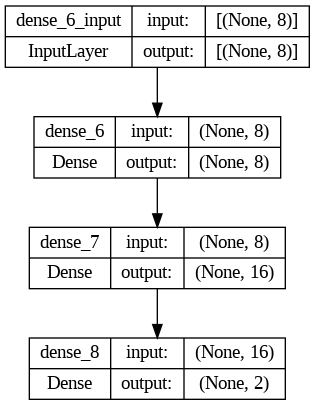

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
optim = Adam(lr=0.001)

model.compile(
    optimizer=optim,
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
    )

history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/30
830/830 [==============================] - 2s 2ms/step - loss: 1.5531 - Accuracy: 0.5964 - val_loss: 0.9169 - val_Accuracy: 0.6022
Epoch 2/30
830/830 [==============================] - 2s 2ms/step - loss: 0.7989 - Accuracy: 0.6470 - val_loss: 0.8079 - val_Accuracy: 0.5806
Epoch 3/30
830/830 [==============================] - 2s 2ms/step - loss: 0.7770 - Accuracy: 0.6783 - val_loss: 0.7199 - val_Accuracy: 0.6237
Epoch 4/30
830/830 [==============================] - 2s 2ms/step - loss: 0.6701 - Accuracy: 0.6771 - val_loss: 0.7554 - val_Accuracy: 0.5806
Epoch 5/30
830/830 [==============================] - 3s 3ms/step - loss: 0.7191 - Accuracy: 0.6446 - val_loss: 0.7106 - val_Accuracy: 0.6022
Epoch 6/30
830/830 [==============================] - 2s 2ms/step - loss: 0.6743 - Accuracy: 0.6928 - val_loss: 0.6571 - val_Accuracy: 0.5699
Epoch 7/30
830/830 [==============================] - 2s 2ms/step - loss: 0.6529 - Accuracy: 0.6976 - val_loss: 0.6628 - val_Accuracy: 0.5806
Epoch 

In [ ]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

13/13 [==============================] - 0s 2ms/step
0.75


# Simulasi Model

In [ ]:
prediction = model.predict([[54,	1,	89,	126,	64,	153.0,	8.32,	0.009]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
  print("Positive")
else:
  print("Negative")

1/1 [==============================] - 0s 77ms/step
Positive


In [ ]:
prediction = model.predict([[29,	1,	88,	155,	85,	107.0,	5.51,	0.003]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
  print("Positive")
else:
  print("Negative")

1/1 [==============================] - 0s 40ms/step
Negative


# Save Model

In [ ]:
model.save('./heartattack.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('./heartattack.h5')
converter =tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./heartattack.tflite", "wb").write(tflite_model)

3128